In [4]:
import numpy as np
import pandas as pd

import nltk
import spacy

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Naive Bayes Classifier
- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", 
                       "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                       "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                       "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                       "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                       "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                       "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                       "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
                       "there's": "there is", "here's": "here is","they'd": "they would", 
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                       "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", 
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", 
                       "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                       "where's": "where is", "where've": "where have", "who'll": "who will", 
                       "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                       "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                       "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                       "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                       "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                       "you're": "you are", "you've": "you have" }

In [12]:
df_sms = pd.read_csv('data/spam.csv',encoding='latin-1')
df_sms = df_sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df_sms['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
df_sms['length'] = df_sms['sms'].apply(len)

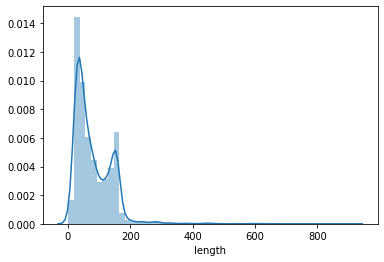

In [15]:
sns.distplot(df_sms['length'])
plt.show()

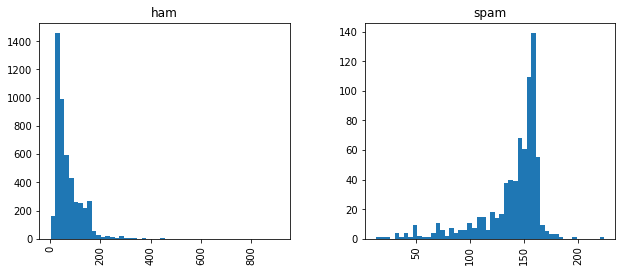

In [16]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.show()

In [17]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
df_sms.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Scikitlearn Count Vectorizer for Preprocessing
- Normalize to lower case
- Remove punctuation
- Tokenize
- Stop word removal
- Bag-of-words representation

In [18]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
documents = ["Hi Mom, happy Thanksgiving, I know I'm your favorite.",
            "However, I never read rubrics when I do peer reviews.",
            "Epstein did not kill himself!"]

In [21]:
# count_vector = CountVectorizer()
count_vector = CountVectorizer(stop_words=stopWords)

count_vector.fit(documents)
count_vector.get_feature_names()

['epstein',
 'favorite',
 'happy',
 'hi',
 'however',
 'kill',
 'know',
 'mom',
 'never',
 'peer',
 'read',
 'reviews',
 'rubrics',
 'thanksgiving']

In [58]:
doc_array = count_vector.transform(documents).toarray()
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,epstein,favorite,happy,hi,however,kill,know,mom,never,peer,read,reviews,rubrics,thanksgiving
0,0,1,1,1,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,1,1,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### Preprocessing the dataset
- Split the dataset into train and test subsets
- Apply count vectorizer to both subset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], df_sms['label'],test_size=0.20, random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions = naive_bayes.predict(testing_data)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652


## Logistic Regression
- Loading dataset
- Visualization
- Preprocessing
- Model creation
- Evaluation